In [0]:
#!pip install tensorflow==2.1

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.__version__



'2.1.0'

In [0]:
df = pd.read_csv('/content/Expander_data.csv')

In [4]:
df.isnull().sum() #lots of null value in run status we should drop this column

Timestamp                          0
Suction Pressure (psig)            0
Suction Temperature (F)            0
Total Flow (gpm)                   0
Speed (rpm)                        0
By-pass Valve Position (%)         0
Discharge Pressure (psig)          0
Discharge Temperature (F)          0
Run Status                    296450
dtype: int64

In [0]:
df.drop(columns='Run Status', axis=1, inplace=True)

In [0]:
#df['Timestamp'] = pd.DatetimeIndex(df['Timestamp'])

In [0]:
#df.drop(columns='Timestamp', inplace=True)
df.drop(columns= 'Timestamp', inplace=True )

In [8]:
df.head(n=50)

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
1,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
3,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
4,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795
5,594.415722,-229.595078,8142.742624,3012.234024,6.0,207.115318,-227.815428
6,597.170202,-230.133506,7964.420754,3012.518826,6.0,220.471189,-228.346539
7,603.331813,-229.551912,8139.809812,3010.796870,6.0,218.614349,-227.744417
8,595.013360,-229.575425,8047.233812,2995.877540,6.0,218.631897,-227.790784
9,598.340373,-229.808081,8125.062853,3011.871916,6.0,212.304464,-228.027485


In [9]:
df.tail(n=50)

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
296400,603.502595,-230.493787,8103.618821,2995.259190,6.0,223.679569,-228.696014
296401,600.083180,-230.503120,8115.198306,2996.994391,6.0,217.301445,-228.700756
296402,605.125565,-229.492857,8048.911177,3008.390439,6.0,228.025184,-227.707824
296403,596.360422,-229.495957,8124.748574,3010.319965,6.0,210.187785,-227.694164
296404,601.351459,-229.798012,7903.699413,3003.141287,6.0,233.366707,-227.984349
296405,602.550212,-230.143054,7939.757779,3006.274541,6.0,228.309044,-228.339519
296406,603.307779,-229.913865,7890.782414,3004.631557,6.0,234.890755,-228.118409
296407,600.067926,-230.500169,7954.642500,2996.012018,6.0,226.411271,-228.702388
296408,598.445340,-230.572012,8049.331200,3010.089012,6.0,216.620695,-228.753849
296409,600.529141,-230.035423,8100.006763,3004.207115,6.0,218.619681,-228.234684


In [0]:
#changing column name

col = {'Suction Pressure (psig)' : 'suc_pres', 'Suction Temperature (F)' :'suc_tem',
       'Total Flow (gpm)' : 'total_flow', 'Speed (rpm)' : 'rpm', 'By-pass Valve Position (%)' : 'bypass_valve' ,
       'Discharge Pressure (psig)' : 'dis_press', 'Discharge Temperature (F)' : 'dis_tem'}
df = df.rename(columns=col )


In [0]:
#len(df.resample('D').mean()) # there are  105 days data 

#d = df.resample('D').mean()

In [0]:
import plotly.express as px

In [13]:
len(df.bypass_valve.unique())
len(df.dis_press.unique())
len(df.dis_tem.unique())


295893

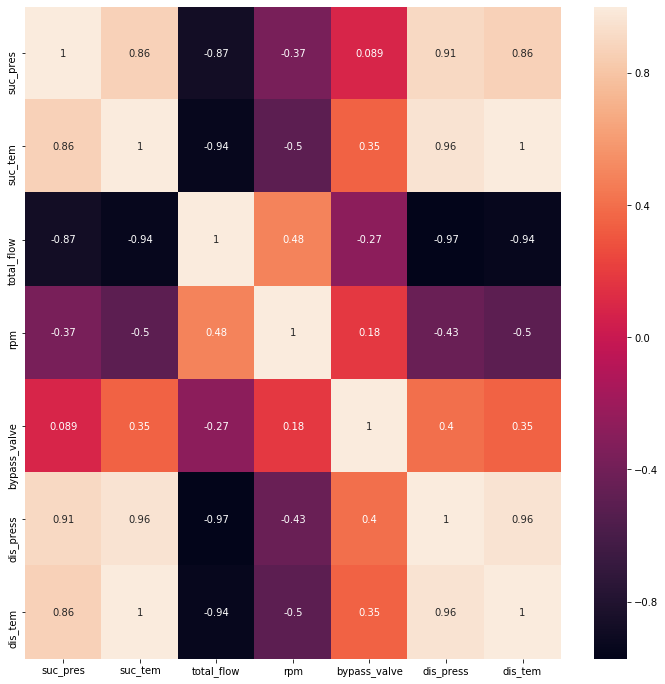

In [14]:
h= df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(h ,annot =True, )
plt.show()

In [0]:
#as we can see  discharge pressure is highly corelated with discharge tem  and suction tem and suction presuure if they increse discharge pressure also increse
# and  rpm and bypass valve not giving so much data in  discharge pressure we can remove 
#total_flow  is highly negative corelated with discharge pressure if totalflow decrease discharge preessure increase

In [0]:
y = df['dis_press']
x = df.drop(columns='dis_press')


In [17]:
from sklearn.preprocessing import StandardScaler
x = x.values

sc_x = StandardScaler()
sc_x.fit_transform(x)
y = y.values
type(x)

numpy.ndarray

In [0]:


#sc_y = StandardScaler()
#y = sc_y.fit_transform(y)
#y = y.reshape(-1,1)
#type(y)

In [0]:
#splitting data in 80:20 ratio

from sklearn.model_selection import train_test_split 
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=41)

In [20]:
x_train.shape, y_train.shape

((237160, 6), (237160,))

In [21]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping 
x_train.shape, y_train.shape



((237160, 6), (237160,))

In [22]:
model =Sequential()

model.add(Dense(128,activation='relu', input_dim =x.shape[1]))
model.add(Dense(64 , activation='relu'))
model.add(Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),loss='mse', metrics=['RootMeanSquaredError'])

r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=50 )


Train on 237160 samples, validate on 59290 samples
Epoch 1/50
237160/237160 [==============================] - 16s 68us/sample - loss: 2945.5246 - RootMeanSquaredError: 54.2728 - val_loss: 130.5431 - val_RootMeanSquaredError: 11.4255
Epoch 2/50
237160/237160 [==============================] - 16s 67us/sample - loss: 59.5445 - RootMeanSquaredError: 7.7165 - val_loss: 18.7773 - val_RootMeanSquaredError: 4.3333
Epoch 3/50
237160/237160 [==============================] - 16s 66us/sample - loss: 23.1996 - RootMeanSquaredError: 4.8166 - val_loss: 82.1287 - val_RootMeanSquaredError: 9.0625
Epoch 4/50
237160/237160 [==============================] - 16s 67us/sample - loss: 20.4619 - RootMeanSquaredError: 4.5235 - val_loss: 14.5874 - val_RootMeanSquaredError: 3.8194
Epoch 5/50
237160/237160 [==============================] - 15s 65us/sample - loss: 13.9671 - RootMeanSquaredError: 3.7373 - val_loss: 7.6720 - val_RootMeanSquaredError: 2.7698
Epoch 6/50
237160/237160 [=============================

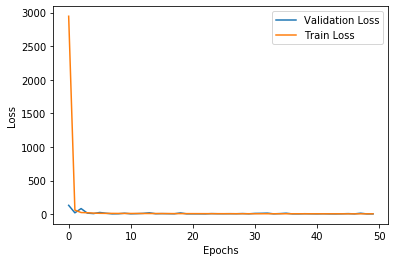

In [23]:
plt.plot(r.history['val_loss'],label="Validation Loss")
plt.plot(r.history['loss'],label="Train Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

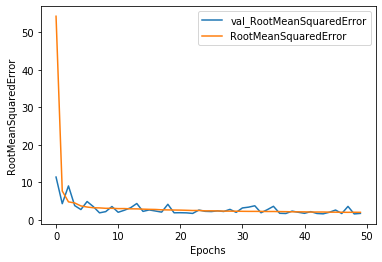

In [24]:
plt.plot(r.history['val_RootMeanSquaredError'],label="val_RootMeanSquaredError")
plt.plot(r.history['RootMeanSquaredError'],label="RootMeanSquaredError")
plt.xlabel('Epochs')
plt.ylabel('RootMeanSquaredError')
plt.legend()
plt.show()


In [0]:
model.save('regression.h5' )